In [10]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

df_train = pd.read_csv('train.csv')
c = df_train.columns


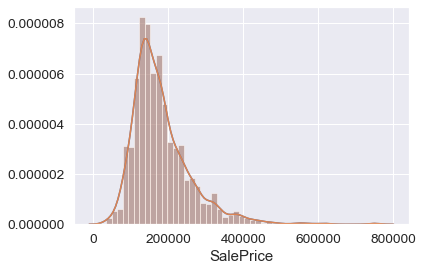

In [13]:
# =============================================================================
# #histogram
# #y axis represnts the probablity
# =============================================================================
sns.distplot(df_train['SalePrice'])
sns.distplot(df_train['SalePrice'])

In [4]:
# =============================================================================
# #skewness and kurtosis
# =============================================================================
print('Skewness : %f' % df_train['SalePrice'].skew())
print('kurtosis : %f' % df_train['SalePrice'].kurt())

Skewness : 1.882876
kurtosis : 6.536282


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


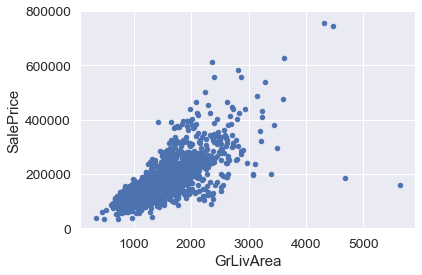

In [7]:
# =============================================================================
# # Relationship with numerical variables
# ## scatter plot grlivarea/saleprice
# ### concat concatenate ###axis=1 means to Series stacked side by side
# =============================================================================
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'],df_train[var]], axis = 1)
data.plot.scatter(x=var, y='SalePrice',ylim = (0,800000))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


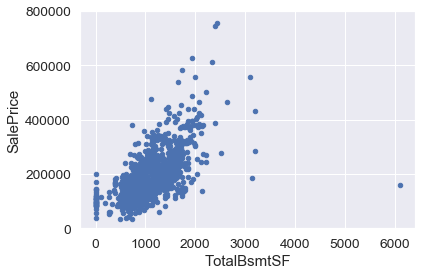

In [8]:
# =============================================================================
# ##scatter plot totalbsmtdf/saleprice
# =============================================================================
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'],df_train[var]], axis =1)
data.plot.scatter(x = var, y ='SalePrice',ylim = (0,800000))

(-0.5, 9.5, 0, 800000)

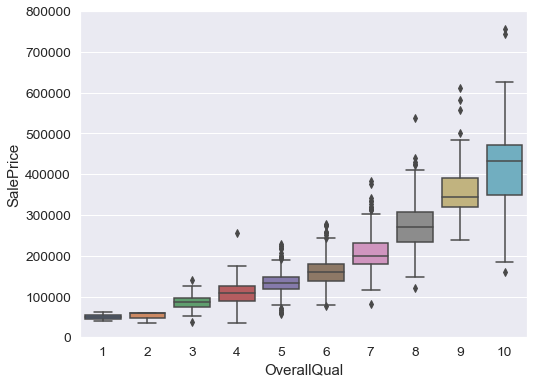

In [9]:
# =============================================================================
# #Relationship with categorical features
# =============================================================================
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis =1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y = "SalePrice", data = data)
fig.axis(ymin=0,ymax = 800000)

(-0.5, 111.5, 0, 800000)

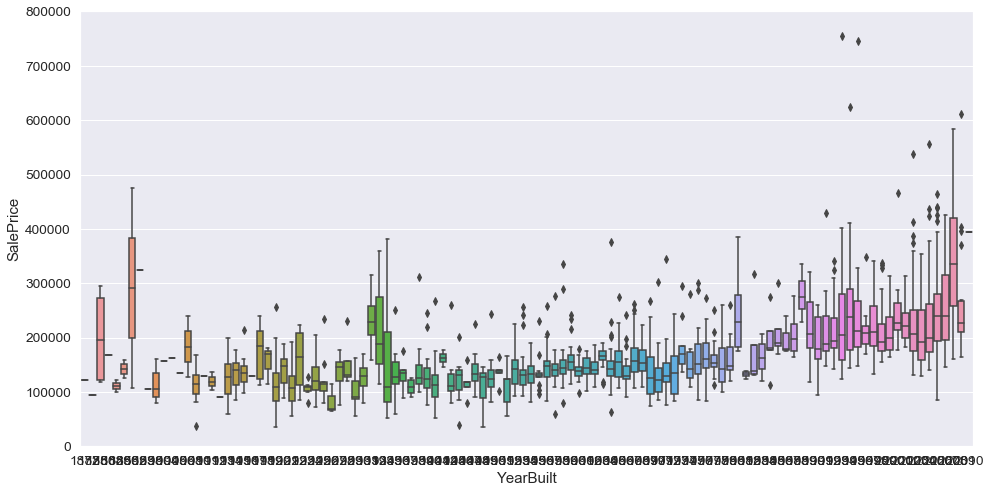

In [14]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis = 1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var,y='SalePrice',data = data)
fig.axis(ymin = 0 ,ymax = 800000)

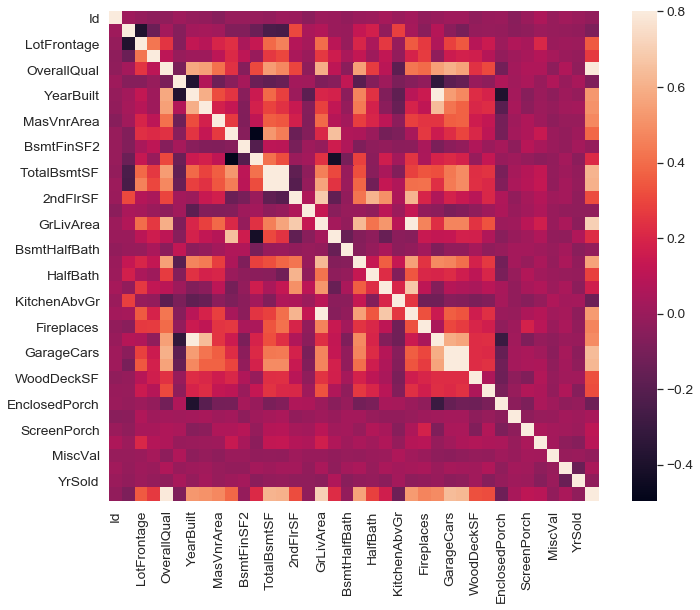

In [15]:
# =============================================================================
# # Correlation matrix(heatmap style)
# # correlation matrix
# =============================================================================

corrmat = df_train.corr()
f,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat,vmax = .8,square = True)

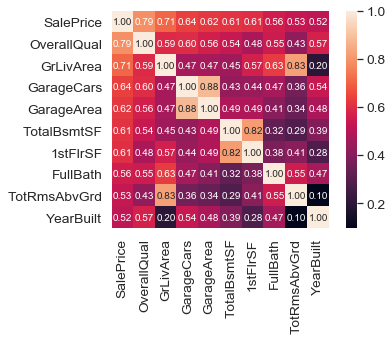

In [16]:
# =============================================================================
# #  Saleprice correlaton matrix(zoomed heatmap style)
# =============================================================================

k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

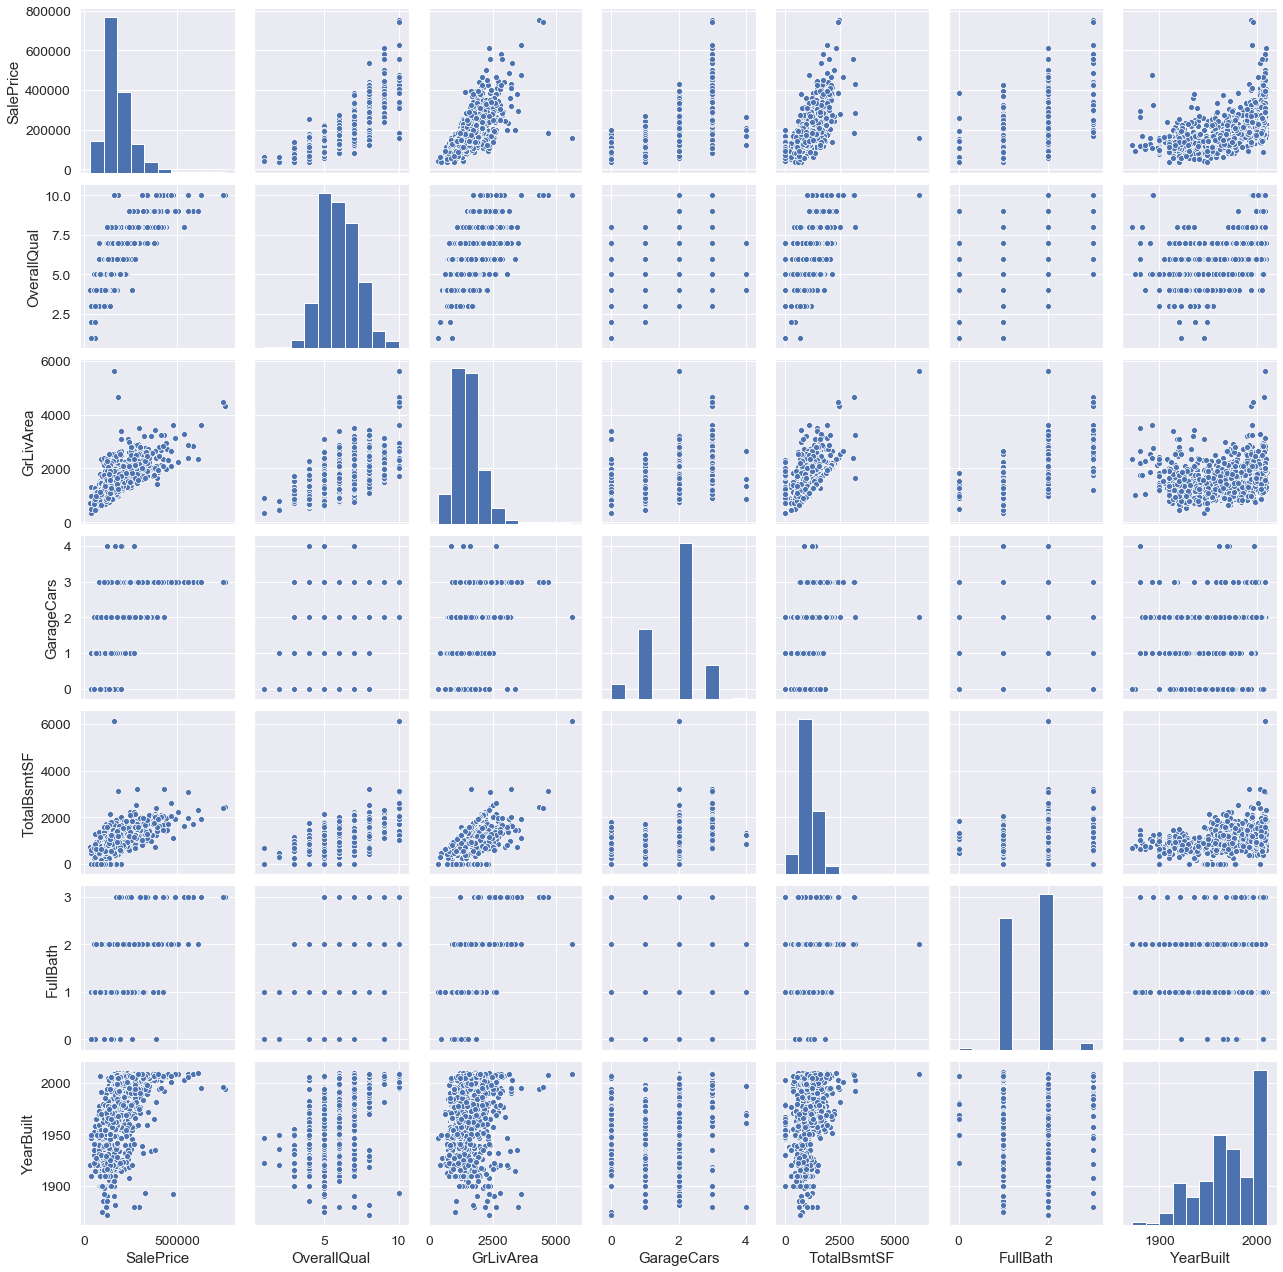

In [17]:
# =============================================================================
# 
# Scatter plots between 'SalePrice' correlated variables
# catterplot
# =============================================================================

# sns.set()
cols = ['SalePrice', 'OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

In [18]:
# =============================================================================
#  Missing data
# =============================================================================
total = df_train.isnull().sum().sort_values(ascending = False)
null_count = df_train.isnull().count()
percent = (df_train.isnull().sum()/ df_train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
